In [5]:
import pandas as pd

df = pd.read_csv('healthcare-dataset-stroke-data.csv')


In [6]:
#count of rows in df
df.shape[0]

5110

In [7]:
#count of NaN over entire dataFrame
df.isna().sum().sum()

201

In [8]:
#Mean of all numerical col
for i in ["age","hypertension",'heart_disease','avg_glucose_level','bmi']:
    print(i+' mean->',df[i].mean())
    print(i+' median->',df[i].median())
    print(i+' std-dev->',df[i].std())
    print()

age mean-> 43.226614481409
age median-> 45.0
age std-dev-> 22.61264672311349

hypertension mean-> 0.0974559686888454
hypertension median-> 0.0
hypertension std-dev-> 0.29660667423379117

heart_disease mean-> 0.05401174168297456
heart_disease median-> 0.0
heart_disease std-dev-> 0.22606298750336543

avg_glucose_level mean-> 106.1476771037182
avg_glucose_level median-> 91.88499999999999
avg_glucose_level std-dev-> 45.28356015058198

bmi mean-> 28.893236911794666
bmi median-> 28.1
bmi std-dev-> 7.854066729680164



In [9]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [10]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\spatil1\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


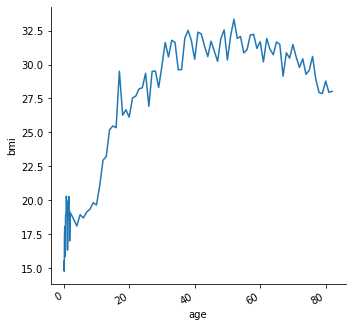

In [11]:
import seaborn as sns
#BMI oof certain age grp vs age
df1 = pd.DataFrame(dict(age=df['age'],
                       bmi=df['bmi']))
g = sns.relplot(x="age", y="bmi", kind="line", data=df1,ci=None)
g.figure.autofmt_xdate()

array([[<AxesSubplot:title={'center':'age'}>]], dtype=object)

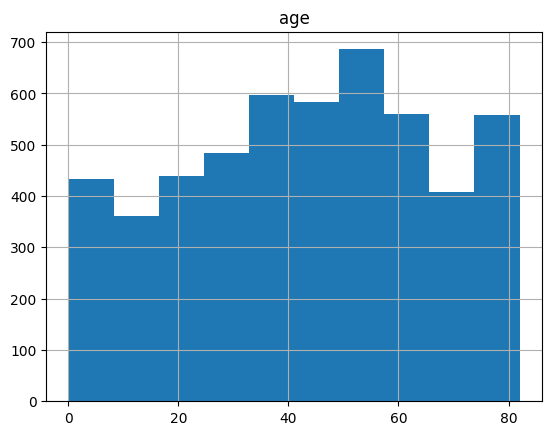

In [12]:
df.hist(column='age')

In [13]:
#RETURNS true if NaN in the column
df['bmi'].isnull().values.any()

True

In [14]:
#first statment get the total  sum of NaN in bmi column
nan_val=df['bmi'].isnull().sum()
total_rows=df.shape[0]
print('percentage of NaN values in BMI -> ',(nan_val/total_rows*100))

percentage of NaN values in BMI ->  3.9334637964774952


In [15]:
df['bmi']=df['bmi'].fillna(df['bmi'].median())
df['bmi'].isnull().values.any()

False

In [16]:
from sklearn.preprocessing import MinMaxScaler
scalar=MinMaxScaler()
df[['avg_glucose_level','bmi']]=scalar.fit_transform(df[['avg_glucose_level','bmi']])
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,0.801265,0.301260,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,0.679023,0.203895,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,0.234512,0.254296,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,0.536008,0.276060,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,0.549349,0.156930,never smoked,1


In [21]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

df['gender'] = LabelEncoder().fit_transform(df['gender'])
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,Private,Urban,0.801265,0.301260,formerly smoked,1
1,51676,0,61.0,0,0,1,Self-employed,Rural,0.679023,0.203895,never smoked,1
2,31112,1,80.0,0,1,1,Private,Rural,0.234512,0.254296,never smoked,1
3,60182,0,49.0,0,0,1,Private,Urban,0.536008,0.276060,smokes,1
4,1665,0,79.0,1,0,1,Self-employed,Rural,0.549349,0.156930,never smoked,1


In [22]:
df['ever_married']  = LabelEncoder().fit_transform(df['ever_married'])
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,Private,Urban,0.801265,0.301260,formerly smoked,1
1,51676,0,61.0,0,0,1,Self-employed,Rural,0.679023,0.203895,never smoked,1
2,31112,1,80.0,0,1,1,Private,Rural,0.234512,0.254296,never smoked,1
3,60182,0,49.0,0,0,1,Private,Urban,0.536008,0.276060,smokes,1
4,1665,0,79.0,1,0,1,Self-employed,Rural,0.549349,0.156930,never smoked,1


In [23]:
df['Residence_type']=LabelEncoder().fit_transform(df['Residence_type'])

In [32]:
import numpy as np
#reshaping the dataframe as numpy array
values = OneHotEncoder().fit_transform( np.array(df['smoking_status']).reshape(-1, 1))
df['smoking_status']=values.toarray()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,Private,1,0.801265,0.301260,1.0,1
1,51676,0,61.0,0,0,1,Self-employed,0,0.679023,0.203895,1.0,1
2,31112,1,80.0,0,1,1,Private,0,0.234512,0.254296,1.0,1
3,60182,0,49.0,0,0,1,Private,1,0.536008,0.276060,1.0,1
4,1665,0,79.0,1,0,1,Self-employed,0,0.549349,0.156930,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,0,80.0,1,0,1,Private,1,0.132167,0.203895,1.0,0
5106,44873,0,81.0,0,0,1,Self-employed,1,0.323516,0.340206,1.0,0
5107,19723,0,35.0,0,0,1,Self-employed,0,0.128658,0.232532,1.0,0
5108,37544,1,51.0,0,0,1,Private,0,0.513203,0.175258,1.0,0


In [34]:
df['work_type']  = OneHotEncoder().fit_transform(np.array(df['work_type']).reshape(-1, 1)).toarray()
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,1.0,1,0.801265,0.301260,1.0,1
1,51676,0,61.0,0,0,1,1.0,0,0.679023,0.203895,1.0,1
2,31112,1,80.0,0,1,1,1.0,0,0.234512,0.254296,1.0,1
3,60182,0,49.0,0,0,1,1.0,1,0.536008,0.276060,1.0,1
4,1665,0,79.0,1,0,1,1.0,0,0.549349,0.156930,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,0,80.0,1,0,1,1.0,1,0.132167,0.203895,1.0,0
5106,44873,0,81.0,0,0,1,1.0,1,0.323516,0.340206,1.0,0
5107,19723,0,35.0,0,0,1,1.0,0,0.128658,0.232532,1.0,0
5108,37544,1,51.0,0,0,1,1.0,0,0.513203,0.175258,1.0,0
